## Import necessary libraries

In [1]:
import warnings
warnings.simplefilter('ignore')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [3]:
sb.set(rc={'figure.figsize':(11.7, 8.27)})

## Read and Display NBA data

In [4]:
nbadata = pd.read_csv(r'C:\Users\User\Downloads\nba_data_science_project\data\rawdata\nbaallelo.csv')

In [5]:
display(nbadata.head())
display(nbadata.tail())

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,...,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
0,1,194611010TRH,NBA,0,1947,11/1/1946,1,0,TRH,Huskies,...,40.294830,NYK,Knicks,68,1300.0000,1306.7233,H,L,0.640065,NaN
1,1,194611010TRH,NBA,1,1947,11/1/1946,1,0,NYK,Knicks,...,41.705170,TRH,Huskies,66,1300.0000,1293.2767,A,W,0.359935,NaN
2,2,194611020CHS,NBA,0,1947,11/2/1946,1,0,CHS,Stags,...,42.012257,NYK,Knicks,47,1306.7233,1297.0712,H,W,0.631101,NaN
3,2,194611020CHS,NBA,1,1947,11/2/1946,2,0,NYK,Knicks,...,40.692783,CHS,Stags,63,1300.0000,1309.6521,A,L,0.368899,NaN
4,3,194611020DTF,NBA,0,1947,11/2/1946,1,0,DTF,Falcons,...,38.864048,WSC,Capitols,50,1300.0000,1320.3811,H,L,0.640065,NaN


,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,...,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
126309,63155,201506110CLE,NBA,0,2015,6/11/2015,100,1,CLE,Cavaliers,...,60.309792,GSW,Warriors,103,1790.9591,1809.9791,H,L,0.546572,NaN
126310,63156,201506140GSW,NBA,0,2015,6/14/2015,102,1,GSW,Warriors,...,68.013329,CLE,Cavaliers,91,1704.3949,1700.7391,H,W,0.765565,NaN
126311,63156,201506140GSW,NBA,1,2015,6/14/2015,101,1,CLE,Cavaliers,...,60.010067,GSW,Warriors,104,1809.9791,1813.6349,A,L,0.234435,NaN
126312,63157,201506170CLE,NBA,0,2015,6/16/2015,102,1,CLE,Cavaliers,...,59.290245,GSW,Warriors,105,1813.6349,1822.2881,H,L,0.481450,NaN
126313,63157,201506170CLE,NBA,1,2015,6/16/2015,103,1,GSW,Warriors,...,68.519516,CLE,Cavaliers,97,1700.7391,1692.0859,A,W,0.518550,NaN


In [6]:
nbadata.columns

Index(['gameorder', 'game_id', 'lg_id', '_iscopy', 'year_id', 'date_game',
       'seasongame', 'is_playoffs', 'team_id', 'fran_id', 'pts', 'elo_i',
       'elo_n', 'win_equiv', 'opp_id', 'opp_fran', 'opp_pts', 'opp_elo_i',
       'opp_elo_n', 'game_location', 'game_result', 'forecast', 'notes'],
      dtype='object')

In [7]:
#Explore the statistical features of the numerical variables/columns

nbadata.describe()

,gameorder,_iscopy,year_id,seasongame,is_playoffs,pts,elo_i,elo_n,win_equiv,opp_pts,opp_elo_i,opp_elo_n,forecast
count,126314.000000,126314.000000,126314.000000,126314.000000,126314.000000,126314.000000,126314.000000,126314.000000,126314.000000,126314.000000,126314.000000,126314.000000,126314.000000
mean,31579.000000,0.500000,1988.200374,43.533733,0.063857,102.729982,1495.236055,1495.236055,41.707889,102.729982,1495.236055,1495.236055,0.500000
std,18231.927643,0.500002,17.582309,25.375178,0.244499,14.814845,112.139945,112.461687,10.627332,14.814845,112.139945,112.461687,0.215252
min,1.000000,0.000000,1947.000000,1.000000,0.000000,0.000000,1091.644500,1085.774400,10.152501,0.000000,1091.644500,1085.774400,0.020447
25%,15790.000000,0.000000,1975.000000,22.000000,0.000000,93.000000,1417.237975,1416.994900,34.103035,93.000000,1417.237975,1416.994900,0.327989
50%,31579.000000,0.500000,1990.000000,43.000000,0.000000,103.000000,1500.945550,1500.954400,42.113357,103.000000,1500.945550,1500.954400,0.500000
75%,47368.000000,1.000000,2003.000000,65.000000,0.000000,112.000000,1576.060000,1576.291625,49.635328,112.000000,1576.060000,1576.291625,0.672011
max,63157.000000,1.000000,2015.000000,108.000000,1.000000,186.000000,1853.104500,1853.104500,71.112038,186.000000,1853.104500,1853.104500,0.979553


In [8]:
# Get the maximum/latest year in the dataframe

nbadata['year_id'].max()

2015

In [9]:
# Get the number of duplicated values, null values, and the categories of the 'is_playoffs' column

display('DUPLICATES; ' , nbadata.duplicated().sum())
display('NULL VALUES; ' , nbadata.isnull().sum())
display('UNIQUE VALUES; ' , nbadata['is_playoffs'].unique())

'DUPLICATES; '

0

'NULL VALUES; '

gameorder             0
game_id               0
lg_id                 0
_iscopy               0
year_id               0
date_game             0
seasongame            0
is_playoffs           0
team_id               0
fran_id               0
pts                   0
elo_i                 0
elo_n                 0
win_equiv             0
opp_id                0
opp_fran              0
opp_pts               0
opp_elo_i             0
opp_elo_n             0
game_location         0
game_result           0
forecast              0
notes            120890
dtype: int64

'UNIQUE VALUES; '

array([0, 1], dtype=int64)

In [10]:
columnstodrop = ['gameorder', 'game_id', 'lg_id', '_iscopy',
                  'fran_id', 'elo_n', 'win_equiv', 'opp_id', 'opp_pts', 
                  'opp_elo_i', 'opp_fran', 'opp_elo_n', 'game_location', 'forecast', 'notes']

In [11]:
# Drop unnecessary columns due to the large amount of null values and less significance for the modelling phase

df = nbadata.drop(columns=columnstodrop)
df.head()

,year_id,date_game,seasongame,is_playoffs,team_id,pts,elo_i,game_result
0,1947,11/1/1946,1,0,TRH,66,1300.0000,L
1,1947,11/1/1946,1,0,NYK,68,1300.0000,W
2,1947,11/2/1946,1,0,CHS,63,1300.0000,W
3,1947,11/2/1946,2,0,NYK,47,1306.7233,L
4,1947,11/2/1946,1,0,DTF,33,1300.0000,L


##  Extract the necessary part of the data

* The teams currently recognised in the NBA became constant from the 2015 season, therefore, we would need the 2015 section of the dataframe.
* This is to ensure consistency within the dataframe, especially for the ML aspect.

In [12]:
nbadf2015 = df.loc[(df['is_playoffs'] == 0) & (df['year_id'] == 2015)]
nbadf2015.reset_index(inplace=True, drop=True)
nbadf2015.drop(columns=['is_playoffs', 'seasongame'], inplace=True)
nbadf2015.head()

,year_id,date_game,team_id,pts,elo_i,game_result
0,2015,10/28/2014,HOU,108,1596.4641,W
1,2015,10/28/2014,LAL,90,1421.9985,L
2,2015,10/28/2014,NOP,101,1457.2185,W
3,2015,10/28/2014,ORL,84,1359.4265,L
4,2015,10/28/2014,SAS,101,1699.5024,W


In [13]:
# Separate the 'game_result' column into wins and losses columns

nbadf2015 = pd.get_dummies(nbadf2015, columns=['game_result'], prefix='')
nbadf2015.head()

,year_id,date_game,team_id,pts,elo_i,_L,_W
0,2015,10/28/2014,HOU,108,1596.4641,0,1
1,2015,10/28/2014,LAL,90,1421.9985,1,0
2,2015,10/28/2014,NOP,101,1457.2185,0,1
3,2015,10/28/2014,ORL,84,1359.4265,1,0
4,2015,10/28/2014,SAS,101,1699.5024,0,1


In [14]:
# Group the dataframe by the 'year' and 'teams'
# Calculate the average numerical values

groupaverages = nbadf2015.groupby(['year_id', 'team_id'], as_index=False).mean().round()
groupaverages.head()

,year_id,team_id,pts,elo_i,_L,_W
0,2015,ATL,103.0,1608.0,0.0,1.0
1,2015,BOS,101.0,1418.0,1.0,0.0
2,2015,BRK,98.0,1469.0,1.0,0.0
3,2015,CHI,101.0,1567.0,0.0,1.0
4,2015,CHO,94.0,1455.0,1.0,0.0


In [15]:
# Group the dataframe by the 'year' and 'teams'
# Calculate the total/sum numerical values

groupsums = nbadf2015.groupby(['year_id', 'team_id'], as_index=False).sum()
groupsums.drop(columns=['elo_i'], inplace=True)
groupsums.head()

,year_id,team_id,pts,_L,_W
0,2015,ATL,8409,22,60
1,2015,BOS,8312,42,40
2,2015,BRK,8038,44,38
3,2015,CHI,8265,32,50
4,2015,CHO,7721,49,33


In [16]:
# Create a league table by merging the total season points, wins, losses and the average elo_rating for each team

nbaleaguetable2015 = groupsums.merge(groupaverages['elo_i'], left_index=True, right_index=True)
elocolumn = nbaleaguetable2015.pop('elo_i')
nbaleaguetable2015.insert(2, 'elo_i', elocolumn)
nbaleaguetable2015.head()

,year_id,team_id,elo_i,pts,_L,_W
0,2015,ATL,1608.0,8409,22,60
1,2015,BOS,1418.0,8312,42,40
2,2015,BRK,1469.0,8038,44,38
3,2015,CHI,1567.0,8265,32,50
4,2015,CHO,1455.0,7721,49,33


In [17]:
# Calculate Win percentage for each team and assign the values to 'W%' column

nbaleaguetable2015['W%'] = ((nbaleaguetable2015['_W']/(nbaleaguetable2015['_W'] + nbaleaguetable2015['_L'])*100)).round(2)
nbaleaguetable2015.sort_values('W%', ascending=False, ignore_index=True, inplace=True)
nbaleaguetable2015.head()

,year_id,team_id,elo_i,pts,_L,_W,W%
0,2015,GSW,1707.0,9016,15,67,81.71
1,2015,ATL,1608.0,8409,22,60,73.17
2,2015,LAC,1648.0,8751,26,56,68.29
3,2015,HOU,1618.0,8522,26,56,68.29
4,2015,SAS,1672.0,8461,27,55,67.07


In [18]:
# Rename columns

nbaleaguetable2015.rename(columns={'year_id': 'season', 'team_id': 'team', 'elo_i': 'elo_rating', 'pts': 'points', '_L': 'L', '_W': 'W'}, inplace=True)

In [19]:
# Create a function to determine teams that qualify for the playoffs based on the top 7 teams with the highest W%

def playoffs(df):
    playoffslist = []
    for i in df.index.values.tolist():
        if i <= 6:
            playoffslist.append(1)
        else:
            playoffslist.append(0)
    df['playoffs_y_n'] = pd.Series(playoffslist)
    return df

In [20]:
# Separate teams into Western and Eastern conferences

west= ['DAL', 'DEN', 'GSW', 'HOU', 'LAC', 
        'LAL', 'MEM', 'MIN', 'NOP', 'OKC', 'PHO', 'POR',
        'SAC', 'SAS', 'UTA']

east = ['ATL', 'BRK', 'BOS', 'CHO', 'CHI',
         'CLE', 'DET', 'IND', 'MIA',
        'MIL', 'NYK', 'ORL', 'PHI', 'TOR', 'WAS']


westleaguetable2015 = nbaleaguetable2015[nbaleaguetable2015['team'].isin(west)]
eastleaguetable2015 = nbaleaguetable2015[nbaleaguetable2015['team'].isin(east)]

westleaguetable2015['conf'] = 'west'
eastleaguetable2015['conf'] = 'east'

westleaguetable2015.reset_index(drop=True, inplace=True)
eastleaguetable2015.reset_index(drop=True, inplace=True)

In [21]:
# Determine the teams that qualify for playoffs from each conference

westleaguetable2015 = playoffs(westleaguetable2015)
eastleaguetable2015 = playoffs(eastleaguetable2015)

display('WESTERN CONFERENCE; ', westleaguetable2015.head())
display('EASTERN CONFERENCE; ', eastleaguetable2015.head())

'WESTERN CONFERENCE; '

,season,team,elo_rating,points,L,W,W%,conf,playoffs_y_n
0,2015,GSW,1707.0,9016,15,67,81.71,west,1
1,2015,LAC,1648.0,8751,26,56,68.29,west,1
2,2015,HOU,1618.0,8522,26,56,68.29,west,1
3,2015,SAS,1672.0,8461,27,55,67.07,west,1
4,2015,MEM,1622.0,8062,27,55,67.07,west,1


'EASTERN CONFERENCE; '

,season,team,elo_rating,points,L,W,W%,conf,playoffs_y_n
0,2015,ATL,1608.0,8409,22,60,73.17,east,1
1,2015,CLE,1542.0,8457,29,53,64.63,east,1
2,2015,CHI,1567.0,8265,32,50,60.98,east,1
3,2015,TOR,1574.0,8527,33,49,59.76,east,1
4,2015,WAS,1538.0,8080,36,46,56.10,east,1


## Data Visualisation

* A horizontal bar plot to visualise the winrates of the teams in each conference for the 2015 season

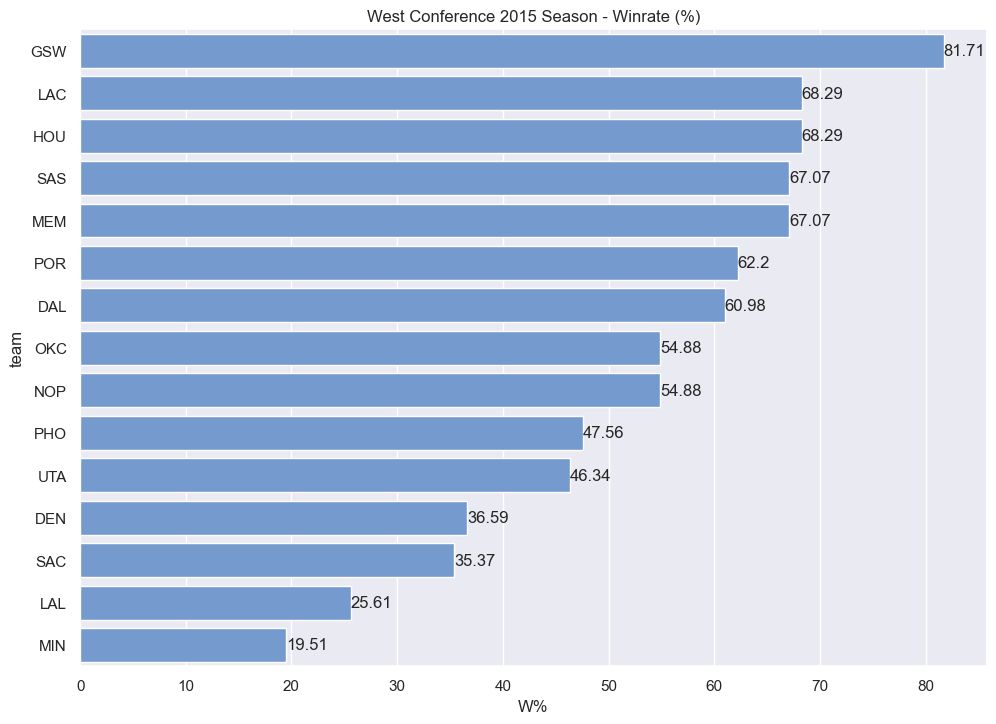

In [22]:
ax1 = sb.barplot(x='W%', y='team',data=westleaguetable2015, color='#69d')
for i in ax1.containers:
    ax1.bar_label(i)
ax1.set_title('West Conference 2015 Season - Winrate (%)')
plt.show()

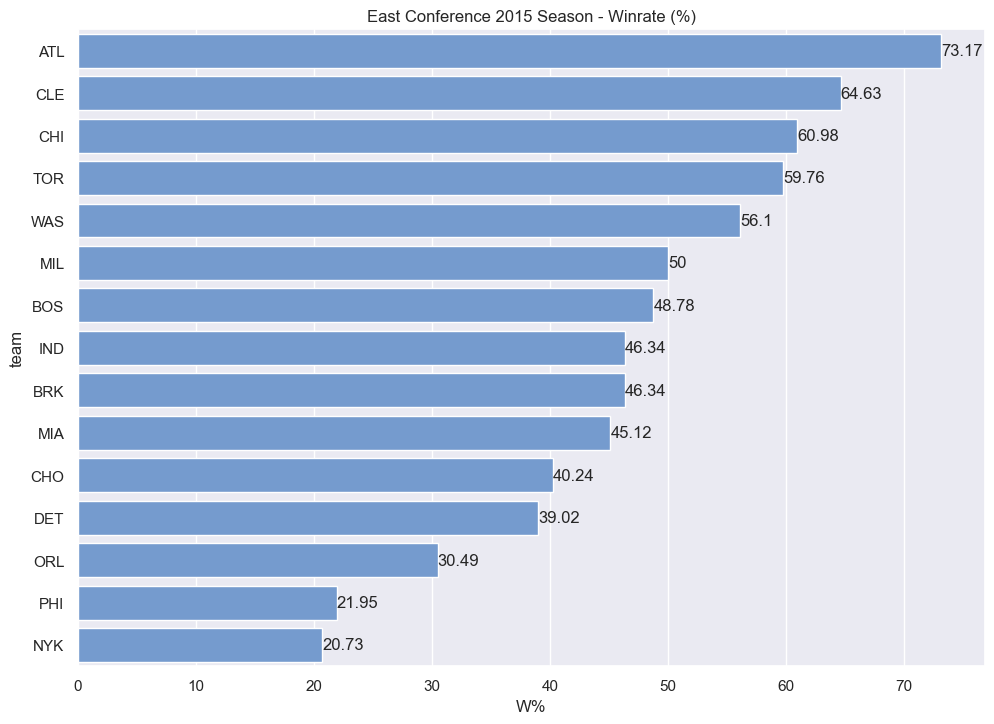

In [23]:
ax2 = sb.barplot(x='W%', y='team',data=eastleaguetable2015, color='#69d')
for i in ax2.containers:
    ax2.bar_label(i)
ax2.set_title('East Conference 2015 Season - Winrate (%)')
plt.show()

In [24]:
# Merge west and east league tables to form a dataframe for NBA 2015 data

nba2015 = pd.concat([westleaguetable2015, eastleaguetable2015], axis=0, ignore_index=True)

In [25]:
nba2015.head()

,season,team,elo_rating,points,L,W,W%,conf,playoffs_y_n
0,2015,GSW,1707.0,9016,15,67,81.71,west,1
1,2015,LAC,1648.0,8751,26,56,68.29,west,1
2,2015,HOU,1618.0,8522,26,56,68.29,west,1
3,2015,SAS,1672.0,8461,27,55,67.07,west,1
4,2015,MEM,1622.0,8062,27,55,67.07,west,1


In [26]:
# Save to csv file

#nba2015.to_csv(r"C:\Users\User\Downloads\nba_data_science_project\data\transformed_data\nba_2015.csv", index=False)